## Mid-Term Test
Regression  
해당 소스를 활용하여 연비(Mile per gallen)를 예측  

- ML (RF, DT, LR)
- DL (FCNN, 순환데이터로 변환후 CNN))측 

구하라를 구하라NN



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [197]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'carname']

df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17388\2713006965.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carname       398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [210]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [212]:
df = df.dropna()

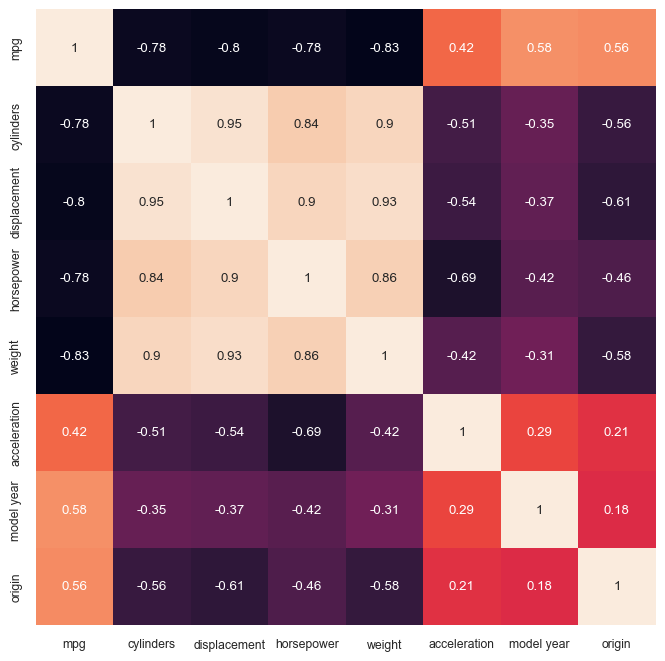

In [203]:
# 상관계수
df = df.drop(['carname'], axis=1)
df_corr=df.corr()

#히트맵
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [63]:
bmi_corr = df_corr['mpg'].sort_values(ascending=False)
print(bmi_corr.iloc[1:])  # 첫 번째 인덱스(BMI 자기 자신)를 제외한 상관관게 내림차순 정렬

model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


In [65]:
df = df[['model year', 'origin', 'acceleration', 'mpg']]
df

,model year,origin,acceleration,mpg
0,70,1,12.0,18.0
1,70,1,11.5,15.0
2,70,1,11.0,18.0
3,70,1,12.0,16.0
4,70,1,10.5,17.0
...,...,...,...,...
393,82,1,15.6,27.0
394,82,2,24.6,44.0
395,82,1,11.6,32.0
396,82,1,18.6,28.0


In [67]:
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [77]:
# RF
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(y_test, y_preds))
print('r2 score', r2_score(y_test, y_preds))

평균제곱근오차 37.09674606967428
r2 score 0.41540686059462306


In [79]:
# DTR
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(y_test, y_preds))
print('r2 score', r2_score(y_test, y_preds))

평균제곱근오차 48.12035069444445
r2 score 0.2416901787310861


In [81]:
# LR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(y_test, y_preds))
print('r2 score', r2_score(y_test, y_preds))

평균제곱근오차 30.71739138353639
r2 score 0.5159366207074214


## DL
- FCNN

In [110]:
X = df.drop(['mpg'], axis=1).values
y = df['mpg'].values

In [112]:
Y = pd.get_dummies(y).values

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [116]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [118]:
X_train.shape, X_test.shape

((318, 3), (80, 3))

In [120]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(3,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

In [122]:
model.compile(loss='mse', metrics=['mse'])

In [124]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history=model.fit(x=X_train, y=y_train, epochs=30, validation_data= (X_test,y_test), 
                  callbacks=[early_stopping_cb])

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0081 - val_mse: 0.0081


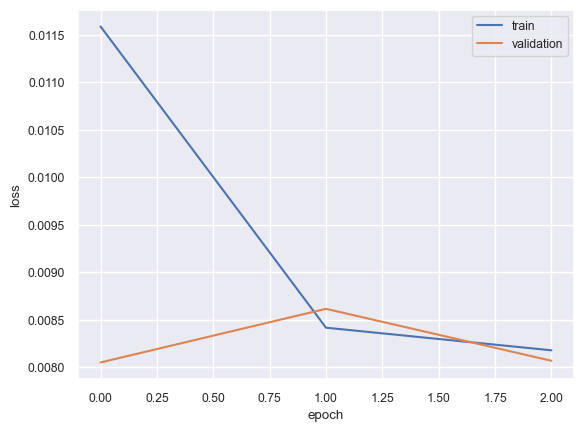

In [128]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [130]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - mse: 0.0081 


[0.008051831275224686, 0.008051831275224686]

## CNN

In [167]:
X = df.drop(['mpg'], axis=1).values
y = df['mpg'].values

In [169]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [171]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [173]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

In [175]:
# Split sequence 재정의 - 평균
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        # 입력 시퀀스는 마지막 열을 제외한 값
        seq_x = sequences[i:end_ix, :-1]
        # 출력 y는 마지막 열의 평균값
        seq_y = np.mean(sequences[i:end_ix, -1])
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [177]:
X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(314, 5, 3) (314,)
(76, 5, 3) (76,)


In [179]:
# One-Hot Encode
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [181]:
from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Dropout

In [183]:
# regressor
n_timestemps, n_feautes, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

regressor = keras.Sequential()
regressor.add(Input(shape=(n_timestemps,n_feautes)))

# convolution layer
regressor.add(Conv1D(64, kernel_size=5, activation='relu', padding='same'))
regressor.add(MaxPooling1D(2, padding='same'))
regressor.add(Dropout(0.1))

regressor.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
regressor.add(MaxPooling1D(2, padding='same'))
regressor.add(Dropout(0.1))

# output layer
regressor.add(Flatten())
regressor.add(Dense(1))

In [185]:
# optimizer, lossfunction
regressor.compile(loss='mse', metrics=['mse'])

In [187]:
regressor.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 5, 64)               │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 3, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,265 (28.38 KB)

 Trainable params: 7,265 (28.38 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = regressor.fit(X_train, y_train_onehot, validation_split=0.1, batch_size=32,
                    epochs=100, callbacks=[early_stopping_cb])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0174 - val_mse: 0.0174


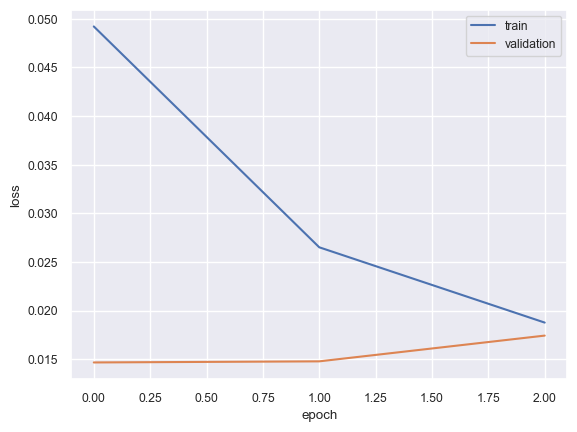

In [190]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [191]:
regressor.evaluate(X_test, y_test_onehot)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mse: 0.0207  


[0.021475210785865784, 0.021475210785865784]